# 【問題1】2次元畳み込み層の作成
1次元畳み込み層のクラスConv1dを発展させ、2次元畳み込み層のクラスConv2dを作成してください。


フォワードプロパゲーションの数式は以下のようになります。

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# 【問題2】小さな配列での2次元畳み込み層の実験
次に示す小さな配列でフォワードプロパゲーションとバックプロパゲーションが正しく行えているか確認してください。


入力 x、重み w を次のようにします。


In [34]:
# CNN2 のフォワードを流す時の入力データ
# (1,1,4,4)
import numpy as np

x = np.array([[[[ 1,  2,  3,  4],
                [ 5,  6,  7,  8],
                [ 9, 10, 11, 12],
                [13, 14, 15, 16]]]])
# (2,3,3)
w = np.array([[[ 0.,  0.,  0.],
               [ 0.,  1.,  0.],
               [ 0., -1.,  0.]],
              [[ 0.,  0.,  0.],
               [ 0., -1.,  1.],
               [ 0.,  0.,  0.]]])

'''
# 出力
array([[[-4, -4],
        [-4, -4]],
       [[ 1,  1],
        [ 1,  1]]])
'''
w.shape, x.shape

((2, 3, 3), (1, 1, 4, 4))

In [39]:
simple_conv2d = Conv2d_3(filter_size=3, initializer=SimpleInitializer(0.01), optimizer=SGD(0.01), pa=0)
simple_conv2d.forward(x)

array([[[[-0.13566615, -0.15257876],
         [-0.20331658, -0.22022919]]]])

In [42]:
# バックプロぱゲーション
# (?,1,2,2,)
delta = np.array([[[ -4,  -4],
                   [ 10,  11]],
                  [[  1,  -7],
                   [  1, -11]]])

'''
# 出力結果
array([[-5,  4],
       [13, 27]])
'''
delta = delta[np.newaxis, :, :, :]

In [43]:
#simple_conv2d.backward(delta)

# 【問題3】2次元畳み込み後の出力サイズ
畳み込みを行うと特徴マップのサイズが変化します。どのように変化するかは以下の数式から求められます。この計算を行う関数を作成してください。

In [7]:
def out_size(in_size, f, p=0, s=1):
    return int((in_size+2*p-f) // s) + 1

# 【問題4】最大プーリング層の作成
最大プーリング層のクラスMaxPool2Dを作成してください。プーリング層は数式で表さない方が分かりやすい部分もありますが、数式で表すとフォワードプロパゲーションは以下のようになります。



In [8]:
class MaxPool2D:
    def __init__(self, st):
        self.st_h = st[0]
        self.st_w = st[1]
        pass
    
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_in_channels, n_in_h, n_in_w)
            入力
        """
        self.X = X
        self.n_samples, self.n_in_channels, self.n_in_h, self.n_in_w = X.shape
        A = np.zeros((self.n_samples, self.n_in_channels, self.n_in_h//self.st_h, self.n_in_w//self.st_w))
        self.Aij = np.zeros(((self.n_in_h*self.n_in_w)//(self.st_h*self.st_w), X.ndim), dtype=int)
        for t in range(self.n_samples):
            for m in range(self.n_in_channels):
                for i in range(self.n_in_h//self.st_h):
                    for j in range(self.n_in_w//self.st_w):
                        X1 = X[t, m, i*self.st_h:(i+1)*self.st_h, j*self.st_w:(j+1)*self.st_w]
                        #print(X1)
                        A[t, m, i, j] = np.max(X1)
                        #print(A)
                        idx = np.argmax(X1)
                        #print(idx)
                        self.Aij[i*(self.n_in_w//self.st_w) + j] = np.array([t, m, i*self.st_h + idx//self.st_h, j*self.st_w + idx%self.st_h], dtype=int)
                         #print(np.array([t, m, i*self.st_h + idx//self.st_h, j*self.st_w + idx%self.st_h]))

                        #print(self.Aij.shape)
        return A
    
    def backward(self, dA):
        a = np.zeros(self.X.shape)
        #print(a.shape)
        #print(a[tuple(self.Aij.T)])
        a[tuple(self.Aij.T)] = 1
        #print(a)
        #print(self.Aij.T.shape)
        #print(tuple(self.Aij.T))
        return a*dA



array3 = np.array([[[8, 4, 1], [7, 2, 12]],
                   [[6, 11, 3], [5, 9, 10]]])
array2 = np.array([[8, 4, 1, 7, 2, 12],
                   [6, 11, 3, 5, 9, 10]])
print(array3.shape)
np.argmax(array3, axis=1)
np.argmax(array2, axis=0)

(2, 2, 3)


array([0, 1, 1, 0, 1, 0])

In [46]:
maxpool2d = MaxPool2D([2,2])
print(maxpool2d.forward(np.arange(1*1*8*8).reshape(1,1,8,8)))

[[[[ 9. 11. 13. 15.]
   [25. 27. 29. 31.]
   [41. 43. 45. 47.]
   [57. 59. 61. 63.]]]]


In [47]:
np.arange(1*1*8*8).reshape(1,1,8,8)

array([[[[ 0,  1,  2,  3,  4,  5,  6,  7],
         [ 8,  9, 10, 11, 12, 13, 14, 15],
         [16, 17, 18, 19, 20, 21, 22, 23],
         [24, 25, 26, 27, 28, 29, 30, 31],
         [32, 33, 34, 35, 36, 37, 38, 39],
         [40, 41, 42, 43, 44, 45, 46, 47],
         [48, 49, 50, 51, 52, 53, 54, 55],
         [56, 57, 58, 59, 60, 61, 62, 63]]]])

In [48]:
maxpool2d.backward(np.arange(1*1*8*8).reshape(1,1,8,8))

array([[[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  9.,  0., 11.,  0., 13.,  0., 15.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0., 25.,  0., 27.,  0., 29.,  0., 31.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0., 41.,  0., 43.,  0., 45.,  0., 47.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0., 57.,  0., 59.,  0., 61.,  0., 63.]]]])

In [49]:
b=np.array([[4, 2, 1, 5],
       [3, 5, 6, 2],
       [1, 8, 1, 9]])
np.argmax(b)

11

# 【問題6】平滑化
平滑化するためのFlattenクラスを作成してください。


フォワードのときはチャンネル、高さ、幅の3次元を1次元にreshapeします。その値は記録しておき、バックワードのときに再びreshapeによって形を戻します。


この平滑化のクラスを挟むことで出力前の全結合層に適した配列を作ることができます。

In [9]:
class Flatten:
    
    def forward(self, A):
        self.n_samples, self.n_out_channels, self.n_out_h, self.n_out_w = A.shape
        return A.reshape(self.n_samples, -1)
    
    def backward(self, dA):
        return dA.reshape(self.n_samples, self.n_out_channels, self.n_out_h, self.n_out_w)

# 【問題7】学習と推定
作成したConv2dを使用してMNISTを学習・推定し、Accuracyを計算してください。


精度は低くともまずは動くことを目指してください。

In [11]:
class ActSigmoid:
    def forward(self, A):
        self.A = A
        return self.sigmoid(A)
    
    def backward(self, dZ):
        _sig = self.sigmoid(self.A)
        return dZ * (1 - _sig)*_sig
    
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

class ActTanh:
    
    def forward(self, A):
        self.A = A
        return np.tanh(A)
    
    def backward(self, dZ):
        return dZ * (1 - (np.tanh(self.A))**2)

class ActSoftmax:
    
    def forward(self, X):
        self.Z = np.exp(X) / np.sum(np.exp(X), axis=1).reshape(-1,1)
        return self.Z
    
    def backward(self, Y):
        self.loss = self.loss_func(Y)
        return self.Z - Y
    
    def loss_func(self, Y, Z=None):
        """
        y_true : (n_samples, n_output)
        z : (n_samples, n_output)
        """
        if Z is None:
            Z = self.Z
        return (-1)*np.average(np.sum(Y*np.log(Z), axis=1))

class ActReLU:
    def forward(self, A):
        self.A = A
        return np.clip(A, 0, None)
    
    def backward(self, dZ):
        return dZ * np.clip(np.sign(self.A), 0, None)

class ScratchConvNeuralNetrowkClassifier:
    
    def __init__(self, num_epoch=10, lr=0.01, batch_size=20, 
                 n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, 
                 verbose=True, Activater=ActTanh, Optimizer=AdaGrad):
        self.num_epoch = num_epoch
        self.lr = lr
        self.verbose = verbose
        
        self.batch_size = batch_size # バッチサイズ
        self.n_features = n_features # 特徴量の数
        # self.n_nodes1 = n_nodes1 # 1層目のノード数 # self.conv1d_3.n_out になる
        self.n_nodes2 = n_nodes2 # 2層目のノード数
        self.n_output = n_output # 出力のクラス数（3層目のノード数）
        
        self.Activater = Activater
        if Activater == ActSigmoid or Activater == ActTanh:
            self.Initializer = XavierInitializer
        elif Activater == ActReLU:
            self.Initializer = HeInitializer
        else:
            print("活性化関数が不適切")
        self.Optimizer = Optimizer
    
    def fit(self, X, y, X_val=None, y_val=None):
        
        self.val_enable = False
        if X_val is not None:
            self.val_enable = True
        
        #optimizer = self.Optimizer(self.lr)
        self.conv2d_3 = Conv2d_3(filter_size=7, initializer=SimpleInitializer(0.01), optimizer=self.Optimizer(self.lr), n_in_channels=1, n_out_channels=1, pa=3, st= 2)
        self.conv2d_3.n_out_h = out_size(X.shape[-2], self.conv2d_3.filter_size_h, self.conv2d_3.pa_h, self.conv2d_3.st_h)
        self.conv2d_3.n_out_w = out_size(X.shape[-1], self.conv2d_3.filter_size_w, self.conv2d_3.pa_w, self.conv2d_3.st_w)
        self.flatten = Flatten()
        self.activation1 = self.Activater()
        self.FC2 = FC(1*self.conv2d_3.n_out_h*self.conv2d_3.n_out_w, self.n_nodes2, self.Initializer(), self.Optimizer(self.lr))
        self.activation2 = self.Activater()
        self.FC3 = FC(self.n_nodes2, self.n_output, self.Initializer(), self.Optimizer(self.lr))
        self.activation3 = ActSoftmax()
        
        self.loss = []
        self.loss_epoch = [self.activation3.loss_func(y, self.forward_propagation(X))]
        for _ in range(self.num_epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
            self.iter = len(get_mini_batch)
            for mini_X, mini_y in get_mini_batch:
                self.forward_propagation(mini_X)
                self.back_propagation(mini_X, mini_y)
                self.loss.append(self.activation3.loss)
            self.loss_epoch.append(self.activation3.loss_func(y, self.forward_propagation(X)))
        
        if self.verbose:
            self.learning_curve()
            print()
        
    def predict(self, X):
        return np.argmax(self.forward_propagation(X), axis=1)
    
    def forward_propagation(self, X):
        A1 = self.conv2d_3.forward(X)
        A1 = self.flatten.forward(A1)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        return Z3
        
    def back_propagation(self, X, y_true):
        dA3 = self.activation3.backward(y_true) # 交差エントロピー誤差とソフトマックスを合わせている
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dA1 = self.flatten.backward(dA1)
        dZ0 = self.conv2d_3.backward(dA1) # dZ0は使用しない
    
    def learning_curve(self):
        plt.title("model loss")
        plt.xlabel("num_epoch")
        plt.ylabel("loss")
        plt.plot(np.arange(1, self.num_epoch*self.iter + 1), self.loss, label="train_loss")
        plt.plot(np.arange(0, self.num_epoch + 1)*self.iter, self.loss_epoch, label="epoch_loss")
        if self.val_enable:
            plt.plot(np.arange(1, self.num_epoch + 1), self.val_loss, label="val_loss")
        plt.legend()
        plt.show()
        return

class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)
        
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """
        self.X = X
        A = X@self.W + self.B
        return A
    
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        dZ = dA@self.W.T
        self.dB = np.sum(dA, axis=0)
        self.dW = self.X.T@dA
        self.optimizer.update(self)
        return dZ

class XavierInitializer:
    def W(self, n_nodes1, n_nodes2):
        self.sigma = math.sqrt(1 / n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(n_nodes2)
        return B
    
class HeInitializer():
    def W(self, n_nodes1, n_nodes2):
        self.sigma = math.sqrt(2 / n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(n_nodes2)
        return B

class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練用データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma
    def W(self, *shape):
        """
        重みの初期化
        Parameters
        ----------
        Returns
        ----------
        W : (n_nodes1, n_nodes2,)
        W : (n_in_channels, n_out_channels, filter_size,)
        """
        W = self.sigma * np.random.randn(*shape)
        return W
    def B(self, *shape):
        """
        バイアスの初期化
        Parameters
        ----------

        Returns
        ----------
        B : (n_out_channels,)
        B : (n_nodes2,)
        """
        B = self.sigma * np.random.randn(*shape)
        return B

# SGD
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, layer, lr=0.01):
        layer.W -= self.lr * layer.dW# (784, 20) (20,400) (784, 400)        
        layer.B -= self.lr * layer.dB # (400,)   
        return 

class AdaGrad:
    
    def __init__(self, lr):
        self.lr = lr
        self.HW = 1
        self.HB = 1
    
    def update(self, layer):
        self.HW += layer.dW**2
        self.HB += layer.dB**2
        layer.W -= self.lr * np.sqrt(1/self.HW) * layer.dW
        layer.B -= self.lr * np.sqrt(1/self.HB) * layer.dB

In [64]:
def evaluate(y_true, y_pred):
    print("accuracy =", accuracy_score(y_true, y_pred))
    print("precision =", precision_score(y_true, y_pred, average='macro'))
    print("recall =", recall_score(y_true, y_pred, average='macro'))
    print("f1 =", f1_score(y_true, y_pred, average='macro'))
    print(confusion_matrix(y_true, y_pred))

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [13]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
#print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8


In [14]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [15]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [16]:
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print("X_train.shape =", X_train_.shape) # (48000, 784)
print("X_val.shape =", X_val.shape) # (12000, 784)
print("y_train.shape =", y_train_.shape) # (48000, 784)
print("y_val.shape =", y_val.shape) # (12000, 784)

X_train.shape = (48000, 28, 28)
X_val.shape = (12000, 28, 28)
y_train.shape = (48000, 10)
y_val.shape = (12000, 10)


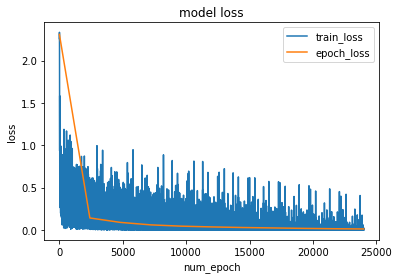

In [21]:
scratch_cnn1 = ScratchConvNeuralNetrowkClassifier(num_epoch=10, lr=0.01, batch_size=20, 
                                                  n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, 
                                                  verbose=True, Activater=ActTanh, Optimizer=SGD)
scratch_cnn1.fit(X_train_, y_train_)

# 計算

# 【問題10】出力サイズとパラメータ数の計算
CNNモデルを構築する際には、全結合層に入力する段階で特徴量がいくつになっているかを事前に計算する必要があります。


また、巨大なモデルを扱うようになると、メモリや計算速度の関係でパラメータ数の計算は必須になってきます。フレームワークでは各層のパラメータ数を表示させることが可能ですが、意味を理解していなくては適切な調整が行えません。


以下の3つの畳み込み層の出力サイズとパラメータ数を計算してください。パラメータ数についてはバイアス項も考えてください。


1.
入力サイズ : 144×144, 3チャンネル
フィルタサイズ : 3×3, 6チャンネル
ストライド : 1
パディング : なし<br>
→outputの形：142,142 <br>
→3（入力チャネル）*3(フィルターサイズ)*3(フィルターサイズ)*6(フィルターのチャネル)＋6(biasの数)


2.


入力サイズ : 60×60, 24チャンネル
フィルタサイズ : 3×3, 48チャンネル
ストライド　: 1
パディング : なし<br>
→outputの形：58,58<br>
→24*3*3*48+48 = 10416<br>

3.


入力サイズ : 20×20, 10チャンネル
フィルタサイズ: 3×3, 20チャンネル
ストライド : 2
パディング : なし<br>
→outputの形：20-3//2 + 1 = (17,17)<br>
→10*3*3*20 + 20<br>
※重みはFN,C,FH,FWの合計に依存するので、端がかけてもパラメータは変動しない。<br>
※違っていたら教えてください！


＊最後の例は丁度良く畳み込みをすることができない場合です。フレームワークでは余ったピクセルを見ないという処理が行われることがあるので、その場合を考えて計算してください。端が欠けてしまうので、こういった設定は好ましくないという例です。

